7607


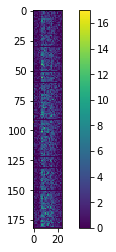

002582_009
9109


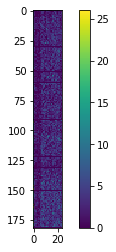

002177_009
23746


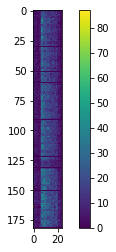

010063_009
18454


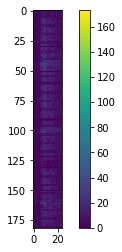

011479_009
17540


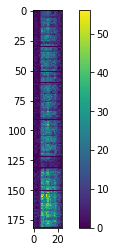

004844_009
10975


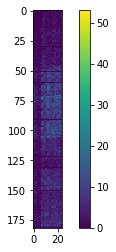

023864_009
9632


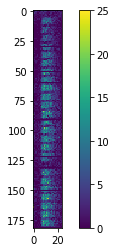

029592_009
11309


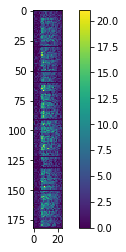

031679_009
8289


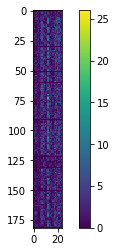

026895_009
22384


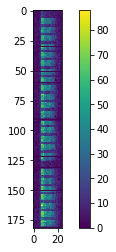

008641_009
18224


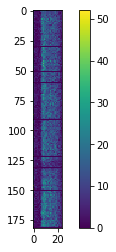

007281_009
12728


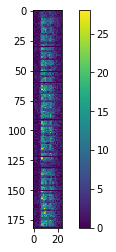

002787_009
18738


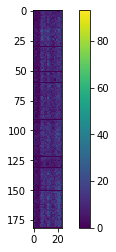

020839_009
9476


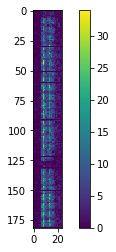

005449_009
26901


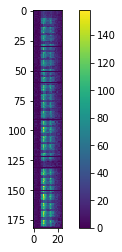

025591_009
5390


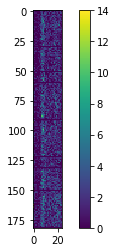

031924_009
4561


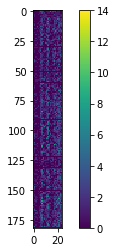

025856_009
8974


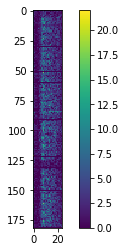

032525_009
8880


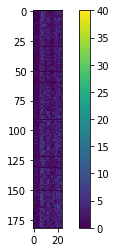

012819_009
8744


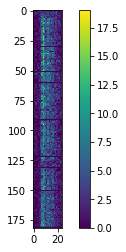

001805_009
15180


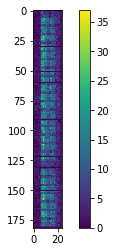

033407_009
21570


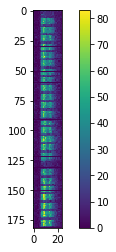

028544_009
6568


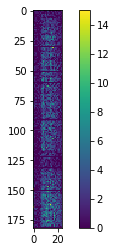

030419_009
16540


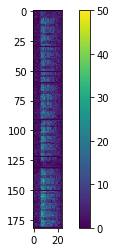

004195_009
12233


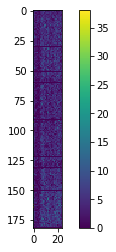

009468_009
13110


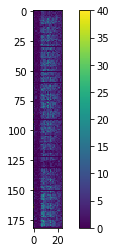

010447_009
12721


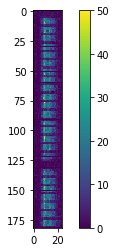

036874_009
17264


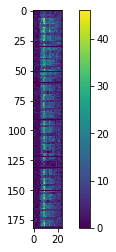

004855_009
15221


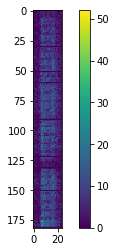

015112_009
7817


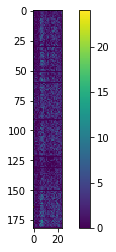

012657_009
1791


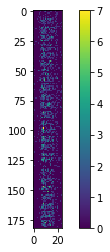

035133_009
10


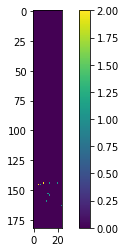

006090_009
16125


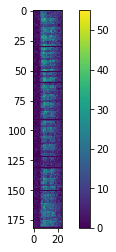

016676_009
9324


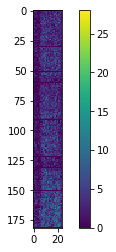

005786_009
492


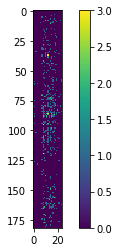

004537_009
2562


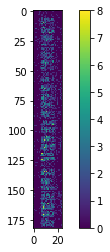

005879_009
14930


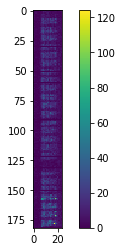

025219_009
12989


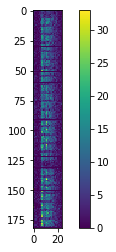

005056_009
9804


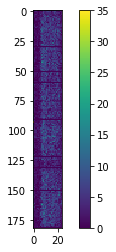

008818_009
11541


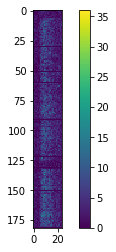

026700_009
9678


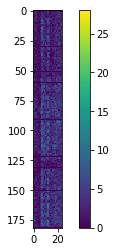

028008_009
3946


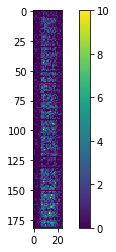

001889_009
30109


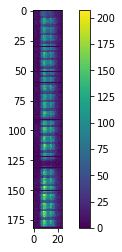

003231_009
14511


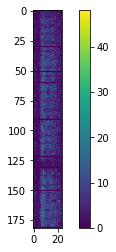

039292_009
22124


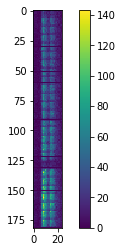

039525_009
8866


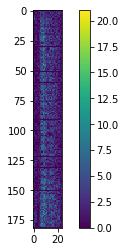

026944_009
28173


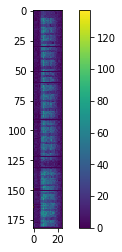

019628_009
6353


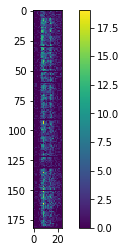

003443_009
7280


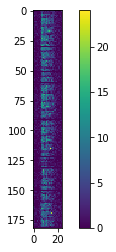

024144_009
11739


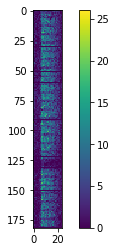

032518_009


In [35]:
import time
import numpy as np
import sys
import datetime
import pandas as pd
import matplotlib.pyplot as plt

date2position = {}
datestr2dateint = {}
str2int = {}
for i in range(24):
    str2int[str(i).zfill(2)] = i
    
for i in range(182):
    date = datetime.date(day=1, month=10, year=2018)+datetime.timedelta(days=i)
    date_int = int(date.__str__().replace("-", ""))
    date2position[date_int] = i
    datestr2dateint[str(date_int)] = date_int

    
def calculate_visit_list(visit_lst):
    ys, zs = [], [] # 开始时间，持续时间
    count = 0
    start = visit_lst[0]
    for i in range(len(visit_lst)-1):
        if str2int[visit_lst[i]] == str2int[visit_lst[i+1]]-1:
            count += 1
        else:
            ys.append(str2int[start])
            zs.append(count)
            start = visit_lst[i+1]
            count = 0
    else:
        ys.append(str2int[start])
        zs.append(count) 
    return ys, zs
        
    

def visit2array(table):
    strings = table[1]
    init = np.zeros((182, 24, 24), dtype=np.uint8)
    for string in strings:
        temp = []
        for item in string.split(','):
            temp.append([item[0:8], item[9:].split("|")])
        for date, visit_lst in temp:
            x = date2position[datestr2dateint[date]]
            ys, zs = calculate_visit_list(visit_lst)
            for i in range(len(ys)):
                y = ys[i]
                z = zs[i]           
                init[x][y][z] += 1
    print(182*24*24-np.sum(init == 0))
    image = np.zeros((182, 24))
    for x in range(182):
        for y in range(24):
            image[x][y] = sum(init[x][y])
    plt.imshow(image)
    plt.colorbar()
    plt.show()
    return init


table = pd.read_csv("../data/valid.txt", header=None)
filenames = [a[0].split("/")[-1].split('.')[0] for a in table.values]
length = len(filenames)
flag = 1600
for index, filename in enumerate(filenames):
    if index > flag:
        table = pd.read_table("../data/train_visit/"+filename+".txt", header=None)
        array = visit2array(table)
        print(filename)
        if index == flag+50:
            break
                           
# print(calculate_visit_list(['10', '11', '13', '14', '17', '18', '19', '20']))
# print(calculate_visit_list(['14', '15']))
# print(calculate_visit_list(['10']))
# print(calculate_visit_list(['11']))
# print(calculate_visit_list(['14', '16']))
# print(calculate_visit_list(['15', '16', '19']))
# print(calculate_visit_list(['10', '11', '12', '14', '15', '16', '18', '19']))
# print(calculate_visit_list(['09', '11', '12', '14', '15', '16', '18', '19']))